## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#loading the entire dataset
data = pd.read_excel("Ited_Jan5_2021_cleaned.xlsx")
data

,Timestamp,Total Scores (100%),"Investment Status (5%, Bonus)",Market Size (30%),Growth (10%),Faster/Better Experience (10%),Precision Improvement (10%),Protected Patents (20%),Team Members (20%),1. Company Name,...,61. Improvement Explained,62. Patient Adoption,63. Adoption by Doctors,64. Doctor improvements,65. Financial incentive for doctors,66. Market Opportunity Size ($M),67. Why DigitalDx?,68. Team Status,1. Company Name.1,69. Ddx Invested
0,2020/11/05 1:13:09 PM CST,60.4,40,100,100,50,70,20,12,Cardio Diagnostics,...,Our test is 2x more sensitive than the gold st...,1.0,0.0,1.0,1.0,6200.0,NaN,No,Cardio Diagnostics,0
1,2020/11/05 4:17:28 PM CST,53.0,40,40,100,100,80,40,15,CereVu Medical System,...,"gold standard (verbal report), our solution (o...",1.0,0.0,1.0,0.0,2000.0,NaN,No,CereVu Medical System,0
2,2020/11/05 4:38:18 PM CST,35.0,60,30,0,50,80,0,50,Micronoma,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Micronoma,0
3,2020/11/06 9:12:00 AM CST,82.5,70,100,100,90,50,100,25,ChipCare Corp.,...,NaN,1.0,0.0,1.0,1.0,16000.0,NaN,No,ChipCare Corp.,0
4,2020/11/06 10:09:53 AM CST,36.4,40,10,100,0,100,20,37,LeukoLifeDx,...,First in this field of genomics,1.0,1.0,1.0,0.0,NaN,1.0,NaN,LeukoLifeDx,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020/12/28 7:20:50 AM CST,19.9,40,0,5,60,90,0,12,Renegade.bio,...,"40% faster time to result, 45% lower cost",1.0,0.0,0.0,0.0,84.4,1.0,NaN,Renegade.bio,0
69,2020/12/28 2:20:36 PM CST,13.0,100,0,0,50,0,0,15,Seventh Sense Biosystems (7SBio),...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Seventh Sense Biosystems (7SBio),0
70,2020/12/28 5:50:21 PM CST,76.5,70,100,100,100,90,40,30,Invenio Imaging,...,NaN,1.0,1.0,1.0,1.0,720.0,NaN,NaN,Invenio Imaging,0
71,2020/12/28 7:35:45 PM CST,26.0,70,5,60,0,0,60,15,Liquid Biotech USA,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,Liquid Biotech USA,0


In [17]:
#Yifu's scores (human generated)
scores = data[['Total Scores (100%)','Investment Status (5%, Bonus)','Market Size (30%)','Growth (10%)','Faster/Better Experience (10%)','Precision Improvement (10%)','Protected Patents (20%)','Team Members (20%)']]
scores

,Total Scores (100%),"Investment Status (5%, Bonus)",Market Size (30%),Growth (10%),Faster/Better Experience (10%),Precision Improvement (10%),Protected Patents (20%),Team Members (20%)
0,60.4,40,100,100,50,70,20,12
1,53.0,40,40,100,100,80,40,15
2,35.0,60,30,0,50,80,0,50
3,82.5,70,100,100,90,50,100,25
4,36.4,40,10,100,0,100,20,37
...,...,...,...,...,...,...,...,...
68,19.9,40,0,5,60,90,0,12
69,13.0,100,0,0,50,0,0,15
70,76.5,70,100,100,100,90,40,30
71,26.0,70,5,60,0,0,60,15


## Modelling Using Yifu's Scores 

(array([ 3., 11.,  9., 14., 10.,  7.,  8.,  5.,  4.,  2.]),
 array([ 4. , 13.3, 22.6, 31.9, 41.2, 50.5, 59.8, 69.1, 78.4, 87.7, 97. ]),
 <a list of 10 Patch objects>)

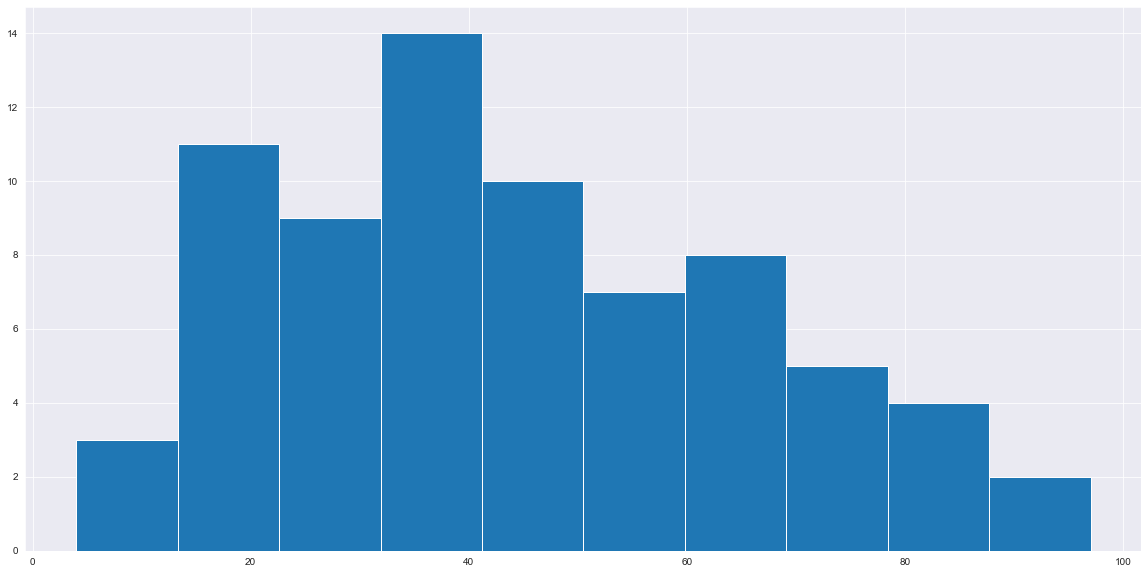

In [4]:
#plotting score dist
plt.figure(figsize = (20,10))
plt.hist(scores['Total Scores (100%)'])

### Classification (Logistic Reg)

In [5]:
#train/test
X, y = scores.values.tolist(), data['69. Ddx Invested'].values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#fitting model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_pred)

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10) 
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1.        , 1.        , 1.        , 0.83333333, 0.66666667,
       0.66666667, 1.        , 1.        , 1.        , 1.        ])

<BarContainer object of 10 artists>

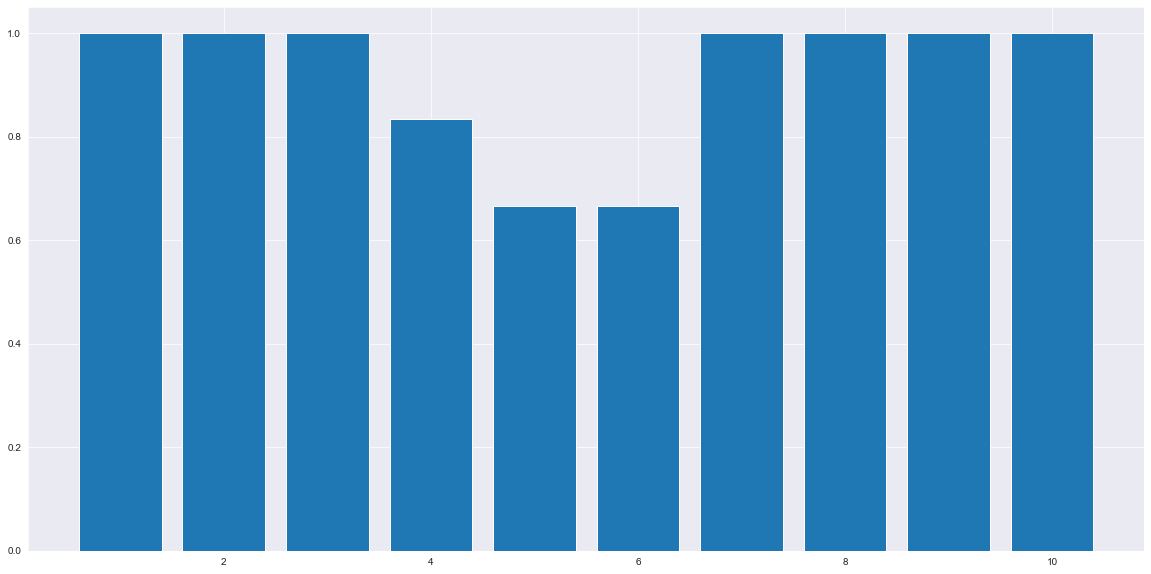

In [6]:
#plotting model results
x = np.arange(1,11)
plt.figure(figsize = (20,10))
plt.bar(x,scores) 

<BarContainer object of 8 artists>

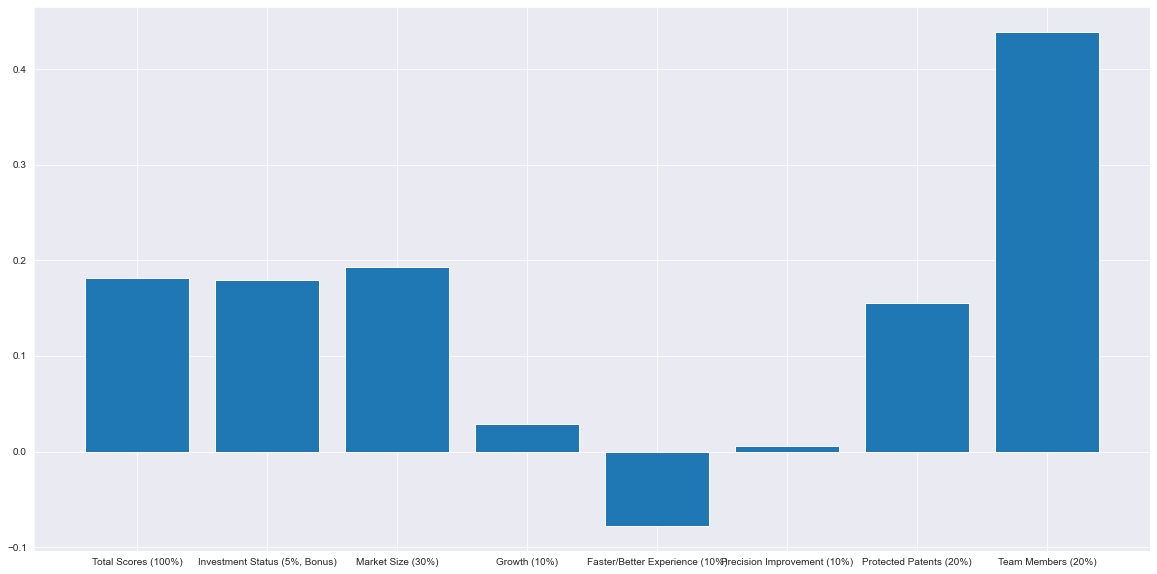

In [7]:
#model coefs
coefs = ['Total Scores (100%)','Investment Status (5%, Bonus)','Market Size (30%)','Growth (10%)','Faster/Better Experience (10%)','Precision Improvement (10%)','Protected Patents (20%)','Team Members (20%)']
coef_values = [ 0.18151027,  0.17901283,  0.19312803,  0.02885934, -0.07791564, 0.00599949,  0.15569233,  0.43894217]

#plotting
plt.figure(figsize = (20,10))
plt.bar(coefs,coef_values)

## Preprocessing Entire Raw Dataset

In [8]:
raw = data[['6. Problem Size in US','7. Problem Size in World','9. Spending in US on problem ($M)','10. Spending in World on problem ($M)',
           '11. Is US Spending Increasing or Decreasing for Problem','12. Is WORLD Spending Increasing or Decreasing for Problem',
           '13. Solution accuracy - Sensitivity','14. Solution accuracy - Specificity','15. Solution accuracy - False Positives',
           '16. Solution accuracy - False Negatives ','17. Study Cohort ','18. CLIA Lab and/or FDA',
           '19. Study Cohort Size  ','20. Study Cohort Location','24. Timing of Results ','26. Patent status ','32. Team expertise diversity',
           '41. Number of  Clinical partnerships','43. Industry partnerships','44. Last Funding Round  ','45. Total funding ','46. Current valuation',
           '47. Current funding round','48. Valuation after funding','50. Non Dilutive Funding ','52. Exit strategy','55. Acquisition Experience on Team',
           '58. Competition ','66. Market Opportunity Size ($M)','1. Company Name','69. Ddx Invested']]
raw

,6. Problem Size in US,7. Problem Size in World,9. Spending in US on problem ($M),10. Spending in World on problem ($M),11. Is US Spending Increasing or Decreasing for Problem,12. Is WORLD Spending Increasing or Decreasing for Problem,13. Solution accuracy - Sensitivity,14. Solution accuracy - Specificity,15. Solution accuracy - False Positives,16. Solution accuracy - False Negatives,...,46. Current valuation,47. Current funding round,48. Valuation after funding,50. Non Dilutive Funding,52. Exit strategy,55. Acquisition Experience on Team,58. Competition,66. Market Opportunity Size ($M),1. Company Name,69. Ddx Invested
0,0.4800,0.00300,3650.0,870000.0,0.350,0.050,0.700,0.610,NaN,NaN,...,3.0,1500000.0,NaN,234000.0,2.0,0.0,1.0,6200.0,Cardio Diagnostics,0
1,0.2500,0.20000,635.0,200000.0,0.065,NaN,0.880,0.715,0.27,0.12,...,3.0,6300000.0,10000000.0,0.0,2.0,0.0,1.0,2000.0,CereVu Medical System,0
2,0.5400,0.00105,NaN,150000.0,NaN,0.500,0.814,0.955,NaN,NaN,...,NaN,40000000.0,NaN,NaN,NaN,NaN,1.0,NaN,Micronoma,0
3,0.3350,NaN,4000.0,NaN,0.100,NaN,NaN,NaN,NaN,NaN,...,2.0,10000000.0,NaN,5500000.0,NaN,1.0,1.0,16000.0,ChipCare Corp.,0
4,0.1800,0.00300,43600.0,108000.0,0.420,NaN,0.960,NaN,NaN,NaN,...,NaN,8000000.0,NaN,NaN,2.0,0.0,0.0,NaN,LeukoLifeDx,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.0100,0.00010,NaN,84400.0,NaN,NaN,NaN,0.992,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,0.0,1.0,84.4,Renegade.bio,0
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seventh Sense Biosystems (7SBio),0
70,0.0550,NaN,150800.0,240000.0,0.085,0.105,0.946,NaN,NaN,NaN,...,2.0,15000000.0,NaN,NaN,NaN,NaN,NaN,720.0,Invenio Imaging,0
71,0.0010,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4000000.0,NaN,NaN,NaN,NaN,1.0,NaN,Liquid Biotech USA,0


In [9]:
#imputing missing values (in the future these need to be filled with the actual #'s)
imputed = raw.fillna(raw.mean())
imputed

,6. Problem Size in US,7. Problem Size in World,9. Spending in US on problem ($M),10. Spending in World on problem ($M),11. Is US Spending Increasing or Decreasing for Problem,12. Is WORLD Spending Increasing or Decreasing for Problem,13. Solution accuracy - Sensitivity,14. Solution accuracy - Specificity,15. Solution accuracy - False Positives,16. Solution accuracy - False Negatives,...,46. Current valuation,47. Current funding round,48. Valuation after funding,50. Non Dilutive Funding,52. Exit strategy,55. Acquisition Experience on Team,58. Competition,66. Market Opportunity Size ($M),1. Company Name,69. Ddx Invested
0,0.480000,0.003000,3650.000000,8.700000e+05,0.350000,0.050000,0.700000,0.61000,0.323,0.21,...,3.000000,1.500000e+06,2.278846e+07,2.340000e+05,2.000000,0.00000,1.000000,6200.000000,Cardio Diagnostics,0
1,0.250000,0.200000,635.000000,2.000000e+05,0.065000,0.247827,0.880000,0.71500,0.270,0.12,...,3.000000,6.300000e+06,1.000000e+07,0.000000e+00,2.000000,0.00000,1.000000,2000.000000,CereVu Medical System,0
2,0.540000,0.001050,268459.012727,1.500000e+05,0.221033,0.500000,0.814000,0.95500,0.323,0.21,...,2.073171,4.000000e+07,2.278846e+07,2.002883e+06,1.633333,0.47619,1.000000,21640.496226,Micronoma,0
3,0.335000,0.102099,4000.000000,1.433049e+06,0.100000,0.247827,0.809376,0.86432,0.323,0.21,...,2.000000,1.000000e+07,2.278846e+07,5.500000e+06,1.633333,1.00000,1.000000,16000.000000,ChipCare Corp.,0
4,0.180000,0.003000,43600.000000,1.080000e+05,0.420000,0.247827,0.960000,0.86432,0.323,0.21,...,2.073171,8.000000e+06,2.278846e+07,2.002883e+06,2.000000,0.00000,0.000000,21640.496226,LeukoLifeDx,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.010000,0.000100,268459.012727,8.440000e+04,0.221033,0.247827,0.809376,0.99200,0.323,0.21,...,3.000000,7.707143e+06,2.278846e+07,2.002883e+06,1.633333,0.00000,1.000000,84.400000,Renegade.bio,0
69,0.154695,0.102099,268459.012727,1.433049e+06,0.221033,0.247827,0.809376,0.86432,0.323,0.21,...,1.000000,7.707143e+06,2.278846e+07,2.002883e+06,1.633333,0.47619,0.862069,21640.496226,Seventh Sense Biosystems (7SBio),0
70,0.055000,0.102099,150800.000000,2.400000e+05,0.085000,0.105000,0.946000,0.86432,0.323,0.21,...,2.000000,1.500000e+07,2.278846e+07,2.002883e+06,1.633333,0.47619,0.862069,720.000000,Invenio Imaging,0
71,0.001000,0.102099,5000.000000,1.433049e+06,0.221033,0.247827,0.809376,0.86432,0.323,0.21,...,2.000000,4.000000e+06,2.278846e+07,2.002883e+06,1.633333,0.47619,1.000000,21640.496226,Liquid Biotech USA,0


## Modelling Using Numeric Predicators Only 

In [10]:
numerics = imputed[['6. Problem Size in US','7. Problem Size in World','9. Spending in US on problem ($M)','10. Spending in World on problem ($M)',
           '11. Is US Spending Increasing or Decreasing for Problem','12. Is WORLD Spending Increasing or Decreasing for Problem',
           '13. Solution accuracy - Sensitivity','14. Solution accuracy - Specificity','15. Solution accuracy - False Positives',
           '16. Solution accuracy - False Negatives ','44. Last Funding Round  ','45. Total funding ','47. Current funding round',
           '48. Valuation after funding','66. Market Opportunity Size ($M)']]
numerics

,6. Problem Size in US,7. Problem Size in World,9. Spending in US on problem ($M),10. Spending in World on problem ($M),11. Is US Spending Increasing or Decreasing for Problem,12. Is WORLD Spending Increasing or Decreasing for Problem,13. Solution accuracy - Sensitivity,14. Solution accuracy - Specificity,15. Solution accuracy - False Positives,16. Solution accuracy - False Negatives,44. Last Funding Round,45. Total funding,47. Current funding round,48. Valuation after funding,66. Market Opportunity Size ($M)
0,0.480000,0.003000,3650.000000,8.700000e+05,0.350000,0.050000,0.700000,0.61000,0.323,0.21,9.161011e+06,616000.0,1.500000e+06,2.278846e+07,6200.000000
1,0.250000,0.200000,635.000000,2.000000e+05,0.065000,0.247827,0.880000,0.71500,0.270,0.12,1.500000e+06,1500000.0,6.300000e+06,1.000000e+07,2000.000000
2,0.540000,0.001050,268459.012727,1.500000e+05,0.221033,0.500000,0.814000,0.95500,0.323,0.21,3.000000e+06,3000000.0,4.000000e+07,2.278846e+07,21640.496226
3,0.335000,0.102099,4000.000000,1.433049e+06,0.100000,0.247827,0.809376,0.86432,0.323,0.21,5.000000e+06,18100000.0,1.000000e+07,2.278846e+07,16000.000000
4,0.180000,0.003000,43600.000000,1.080000e+05,0.420000,0.247827,0.960000,0.86432,0.323,0.21,0.000000e+00,700000.0,8.000000e+06,2.278846e+07,21640.496226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.010000,0.000100,268459.012727,8.440000e+04,0.221033,0.247827,0.809376,0.99200,0.323,0.21,9.161011e+06,1100000.0,7.707143e+06,2.278846e+07,84.400000
69,0.154695,0.102099,268459.012727,1.433049e+06,0.221033,0.247827,0.809376,0.86432,0.323,0.21,1.846000e+07,75760000.0,7.707143e+06,2.278846e+07,21640.496226
70,0.055000,0.102099,150800.000000,2.400000e+05,0.085000,0.105000,0.946000,0.86432,0.323,0.21,3.500000e+06,4500000.0,1.500000e+07,2.278846e+07,720.000000
71,0.001000,0.102099,5000.000000,1.433049e+06,0.221033,0.247827,0.809376,0.86432,0.323,0.21,4.000000e+06,4000000.0,4.000000e+06,2.278846e+07,21640.496226


### Classification (Logistic Reg)

In [11]:
#train/test
X, y = numerics.values.tolist(), data['69. Ddx Invested'].values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10) 
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.83333333, 0.66666667, 0.83333333, 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.6       ])

<BarContainer object of 10 artists>

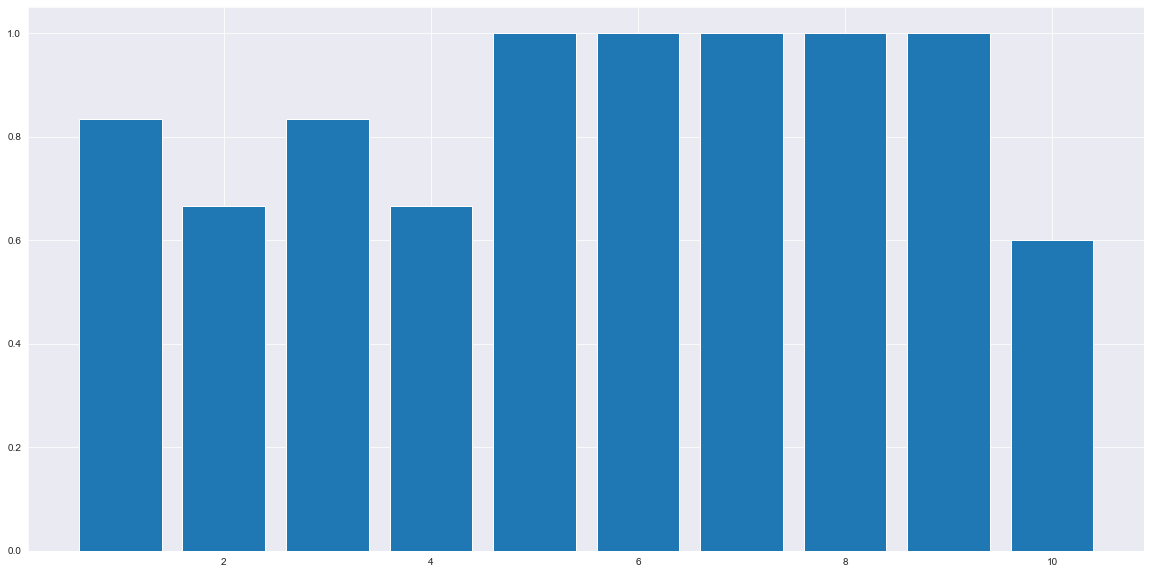

In [12]:
#plotting model results
x = np.arange(1,11)
plt.figure(figsize = (20,10))
plt.bar(x,scores) 

<BarContainer object of 14 artists>

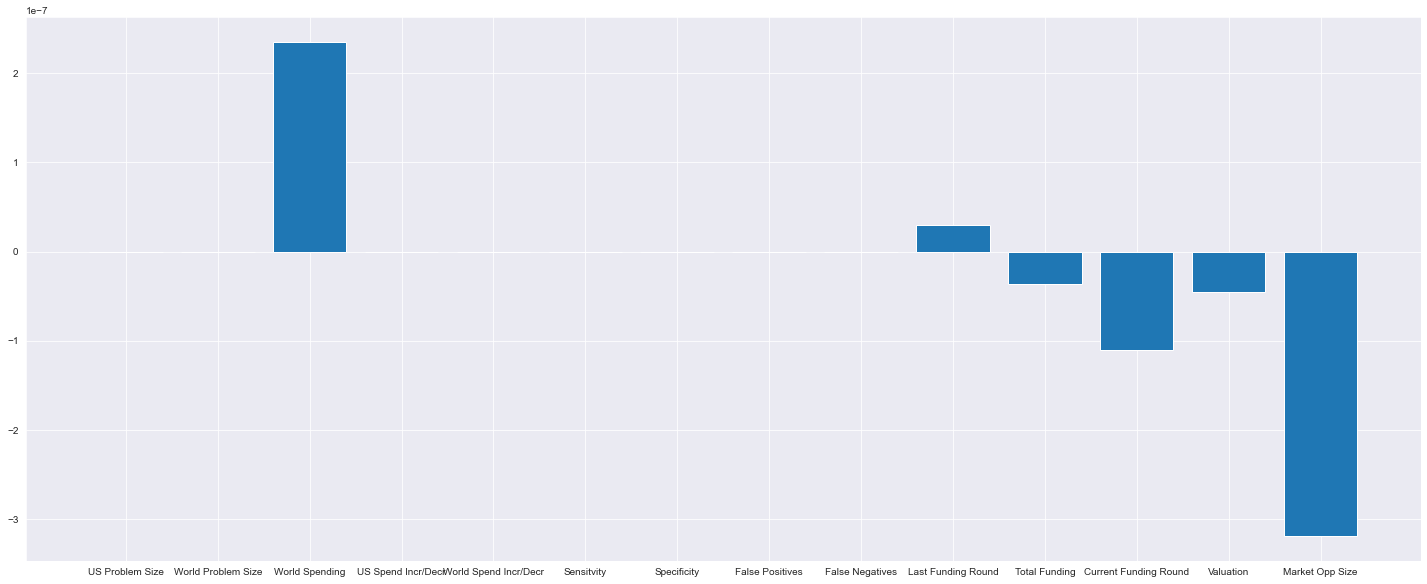

In [13]:
coefs = ['US Problem Size','World Problem Size','World Spending','US Spend Incr/Decr','World Spend Incr/Decr','Sensitvity',
       'Specificity','False Positives','False Negatives','Last Funding Round','Total Funding','Current Funding Round','Valuation','Market Opp Size']

coef_values = [-5.77979855e-12, -4.19057289e-12, 2.35083885e-07,  5.78617270e-12,  5.20997143e-12,
        -3.25296300e-11, -3.40291022e-11,  1.11666724e-12,
        -7.34248511e-12,  2.93765426e-08, -3.66848575e-08,
        -1.10229849e-07, -4.57737087e-08, -3.18808918e-07]

#plotting model coefs
plt.figure(figsize = (25,10))
plt.bar(coefs,coef_values)

## Modelling Using Numerics & Non-Numerics Together

## Non-numeric preferences/weightings (in order of importance)

i)	Problem Size

ii)	QoL Impacts -> Fatal -> Disabling -> Severe Pain -> Rash -> etc

iii) Spending Increasing 

iv)	Solution Accuracy -> 90%+ WANT -> 70%-80% OK -> 60% OK ONLY IF ONLY SOLUTION

v)	Clinical Trial Size (200-300) & in US is Ideal

vi)	Delivery Location -> Doctor’s Office -> Home -> Hospital

vii) Number of Patents -> Granted -> Provisional -> Filed

viii) Diversity of Team

ix)	Past Exits

x) Funding Round -> Up to 10m -> 10-20m -> 20m+

xi)	Buyer Interactions (Aquirers)

xii) Benefits -> Less Invasive -> More Accurate -> Less Expensive -> Earlier

xiii) Non-dilutive funding

In [26]:
num_non_num = data[['6. Problem Size in US','7. Problem Size in World','9. Spending in US on problem ($M)','10. Spending in World on problem ($M)',
           '11. Is US Spending Increasing or Decreasing for Problem','12. Is WORLD Spending Increasing or Decreasing for Problem',
           '13. Solution accuracy - Sensitivity','14. Solution accuracy - Specificity','15. Solution accuracy - False Positives',
           '16. Solution accuracy - False Negatives ','44. Last Funding Round  ','45. Total funding ','47. Current funding round',
           '48. Valuation after funding','66. Market Opportunity Size ($M)','24. Timing of Results ', '26. Patent status ','17. Study Cohort ',
                  '18. CLIA Lab and/or FDA','19. Study Cohort Size  ','20. Study Cohort Location','23. Solution Entry Point','24. Timing of Results ',
                   '26. Patent status ','32. Team expertise diversity','37. Team gender diversity','38. Team entrepreneurship','41. Number of  Clinical partnerships',
                   '41. Number of  Clinical partnerships','43. Industry partnerships','46. Current valuation','49. Non Dilutive Funding','51. Reimbursement code',
                   '52. Exit strategy','55. Acquisition Experience on Team','58. Competition ','62. Patient Adoption',
                   '63. Adoption by Doctors','64. Doctor improvements','65. Financial incentive for doctors']]


num_non_num = num_non_num.fillna(0) #this needs to be fixed going forward with imputed values (temporary workaround)

In [27]:
#train/test
X, y = num_non_num.values.tolist(), data['69. Ddx Invested'].values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=15) 
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1.        , 1.        , 1.        , 1.        , 0.75      ,
       0.75      , 0.75      , 0.5       , 0.75      , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 1.        ])

<BarContainer object of 15 artists>

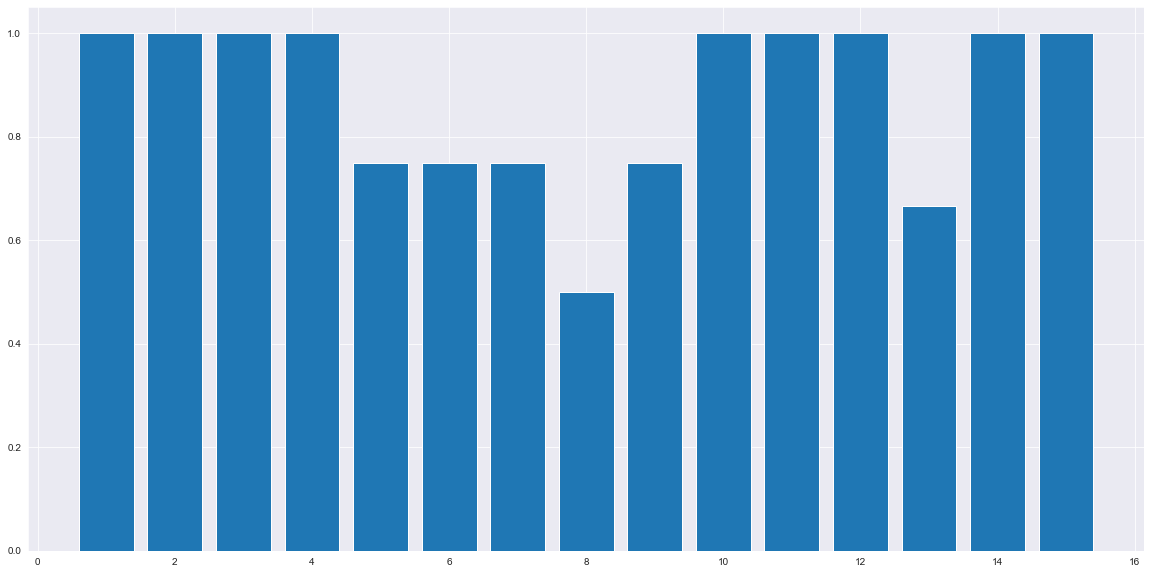

In [31]:
#plotting model results
x = np.arange(1,16)
plt.figure(figsize = (20,10))
plt.bar(x,scores) 

In [ ]:
#coef values to be extracted and plotted